In [6]:
# !pip install pandas
# !pip install matplotlib
# !pip install scipy
# !pip install vincent
# !pip install zipcode
# !pip install tqdm
# !pip install gmplot
# !pip install sklearn
# !pip install seaborn
# !pip install tensorflow-gpu

In [11]:
import pandas
df = pandas.read_csv("loan.csv")

/home/louis/projects/LC_data/.env/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
df.groupby("loan_status").size()

loan_status
Charged Off                                             45248
Current                                                601779
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Does not meet the credit policy. Status:Fully Paid       1988
Fully Paid                                             207723
In Grace Period                                          6253
Issued                                                   8460
Late (16-30 days)                                        2357
Late (31-120 days)                                      11591
dtype: int64

In [13]:
# df = df.iloc[1:100000]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835917 non-null object
emp_length                     842554 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [15]:
to_drop = ["id", "member_id", "url"]
to_drop.extend(["addr_state","zip_code"])
to_drop.append("desc")
to_drop.extend(['funded_amnt', 'funded_amnt_inv'])
to_drop.extend(['total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 
                'total_rec_prncp','tot_coll_amt','total_rev_hi_lim', 'tot_cur_bal'])
to_drop.extend(['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog', 'collections_12_mths_ex_med'])
to_drop.append('emp_title')
to_drop.extend(['last_pymnt_d', 'last_pymnt_amnt'])
to_drop.extend(['recoveries', 'collection_recovery_fee'])
to_drop.append('last_credit_pull_d')
to_drop.extend(['application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint'])
to_drop.extend(['open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'inq_last_12m'])

In [16]:
# df["loan_status"].unique()
def default_or_not(x):
    if x == "Charged Off":
        return 1
    if x == "Fully Paid":
        return 0
    else:
        return None
    
df["default"] = df["loan_status"].apply(default_or_not)
df = df[df["default"].notnull()]
to_drop.append("loan_status")

In [17]:
# df["term"].unique()
df["long_term"] = (df["term"] == ' 60 months').apply(int)
to_drop.append("term")

In [18]:
def emp_year(x):
    try:
        x = x.split()[0]
    finally:
        if x == '<':
            return 0
        if x == '10+':
            return 10
        else:
            return int(x)
        
df = df[df["emp_length"].notnull()]
df["emp_year"] = df["emp_length"].apply(emp_year)
to_drop.append("emp_length")

In [19]:
# single value variable
for k in df.keys():
    #print(k, len(df[k].unique()))
    if len(df[k].unique()) == 1:
        to_drop.append(k)

In [20]:
df = df.join(pandas.get_dummies(df['grade']))
df = df.join(pandas.get_dummies(df['purpose']))
df = df.join(pandas.get_dummies(df['verification_status']))
df = df.join(pandas.get_dummies(df['initial_list_status']))

to_drop.append("grade")
to_drop.append("sub_grade")
to_drop.append("purpose")
to_drop.append("title")
to_drop.append('verification_status')
to_drop.append('initial_list_status')

In [21]:
df.groupby('home_ownership').count()
df['own_home'] = (df['home_ownership'] == "OWN").apply(int)
to_drop.append('home_ownership')

In [22]:
# Delete pymnt_plan
df = df[df['pymnt_plan'] == 'n']
to_drop.append('pymnt_plan')

In [23]:
df['issue_d'].unique()
df['year'] = df['issue_d'].apply(lambda x: int(x.split('-')[1]))
to_drop.append('issue_d')

In [24]:
df['earliest_cr_line'].unique()
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda x: int(x.split('-')[1]))
to_drop.append('earliest_cr_line')

In [25]:
print(to_drop)
df = df.drop(columns = to_drop, errors = 'ignore')
df = df.dropna()

['id', 'member_id', 'url', 'addr_state', 'zip_code', 'desc', 'funded_amnt', 'funded_amnt_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'tot_coll_amt', 'total_rev_hi_lim', 'tot_cur_bal', 'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog', 'collections_12_mths_ex_med', 'emp_title', 'last_pymnt_d', 'last_pymnt_amnt', 'recoveries', 'collection_recovery_fee', 'last_credit_pull_d', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'loan_status', 'term', 'emp_length', 'out_prncp', 'out_prncp_inv', 'next_pymnt_d', 'policy_code', 'grade', 'sub_grade', 'purpose', 'title', 'verification_status', 'initial_list_status', 'home_ownership', 'pymnt_plan', 'issue_d', 'earliest_cr_line']


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 242881 entries, 0 to 887369
Data columns (total 45 columns):
loan_amnt             242881 non-null float64
int_rate              242881 non-null float64
installment           242881 non-null float64
annual_inc            242881 non-null float64
dti                   242881 non-null float64
delinq_2yrs           242881 non-null float64
inq_last_6mths        242881 non-null float64
open_acc              242881 non-null float64
pub_rec               242881 non-null float64
revol_bal             242881 non-null float64
revol_util            242881 non-null float64
total_acc             242881 non-null float64
acc_now_delinq        242881 non-null float64
default               242881 non-null float64
long_term             242881 non-null int64
emp_year              242881 non-null int64
A                     242881 non-null uint8
B                     242881 non-null uint8
C                     242881 non-null uint8
D                     242

In [19]:
# df.to_csv("loan_data_cleaned.csv", sep='\t', encoding='utf-8', index=None)

In [27]:
# import pandas
# df = pandas.read_csv("loan_data_cleaned.csv", sep='\t', encoding='utf-8', )

<h2>Logistic Regression</h2>

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

X = df.drop(columns=['default', 'installment'])
y = df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
weight = y_train*4 + 1 

logreg = LogisticRegression()
# logreg.fit(X_train, y_train)
logreg.fit(X_train, y_train, sample_weight=weight)

y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

/home/louis/projects/LC_data/.env/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Accuracy of logistic regression classifier on test set: 0.62


In [29]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

[[35935 24087]
 [ 3937  8906]]


In [30]:
y_p = logreg.predict_proba(X_test)[:,1] > 0.01

In [31]:
matrix = confusion_matrix(y_test, y_p)
print(matrix)

[[   22 60000]
 [    0 12843]]


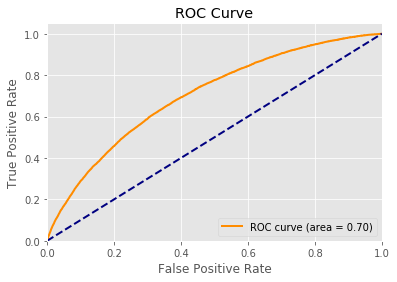

In [32]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, auc
plt.style.use('ggplot')
%matplotlib inline

fpr, tpr,_=roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

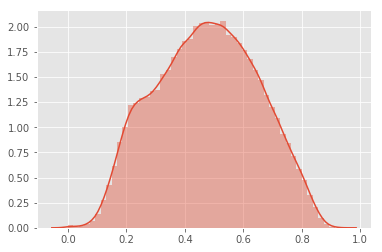

In [33]:
import seaborn as sns
sns.distplot(logreg.predict_proba(X_test)[:,1])

<h2>Profit Prediction</h2>

In [40]:
def profit_predict(X_test, y_test, y_pred, recovery_rate = 0):
    pv = X_test[np.logical_not(y_pred)]['loan_amnt'].sum()
    fv = sum(X_test[np.logical_and(np.logical_not(y_p), np.logical_not(y_test))]['loan_amnt'] * 
                    (X_test[np.logical_and(np.logical_not(y_p), np.logical_not(y_test))]['int_rate'] + 100)/100)
    number = sum(np.logical_not(y_pred))
#     print(number)
    return fv / pv - 1

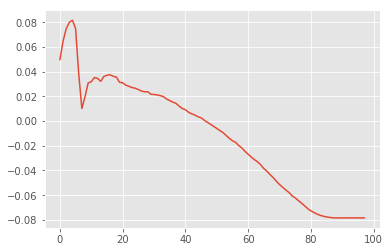

In [42]:
import numpy as np
profit = []
for i in np.arange(0.02, 1, 0.01):
    y_p = logreg.predict_proba(X_test)[:,1] > i
#     print(i, profit_predict(X_test, y_test, y_p))
    profit.append(profit_predict(X_test, y_test, y_p))
plt.plot(profit)

In [36]:
def profit_predict(X_test, y_test, y_pred, recovery_rate = 0):
    pv = X_test[np.logical_not(y_pred)]['loan_amnt'].sum()
    fv = sum(X_test[np.logical_and(np.logical_not(y_p), np.logical_not(y_test))]['loan_amnt'] * 
                    (X_test[np.logical_and(np.logical_not(y_p), np.logical_not(y_test))]['int_rate'] + 100)/100)
    number = sum(np.logical_not(y_pred))
    return fv / pv - 1 - 1 / (number+1)

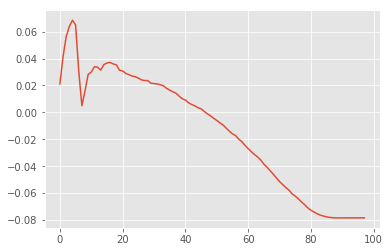

In [39]:
import numpy as np
profit = []
for i in np.arange(0.02, 1, 0.01):
    y_p = logreg.predict_proba(X_test)[:,1] > i
#     print(i, profit_predict(X_test, y_test, y_p))
    profit.append(profit_predict(X_test, y_test, y_p))
plt.plot(profit)

<h2>Heat Map</h2>

In [ ]:
def get_loc(zip_code):
    import zipcode
    short_code = zip_code.replace('x', '')
    l = zipcode.islike(short_code)
    if l:
        location = l[0]
        return (location.lon, location.lat)
    else:
        return (None, None)

from tqdm import tqdm
tqdm.pandas(desc="Pandas progress")
df["lon"] = df["zip_code"].progress_apply(lambda x: get_loc(x)[0])
df["lat"] = df["zip_code"].progress_apply(lambda x: get_loc(x)[1])

import gmplot
df2 = df[df["lon"].notnull()]
gmap = gmplot.GoogleMapPlotter.from_geocode("The United State",4)
gmap.heatmap(df2['lat'], df2['lon'])
gmap.draw('heat_map.html')

In [ ]:
df.groupby("loan_status").size().plot.bar()

In [ ]:
df["annual_inc"].plot.density(logx = True)

In [ ]:
df["annual_inc"].describe()

In [ ]:
df.iloc[3]

In [ ]:
df.groupby("purpose").size().plot.bar()

In [ ]:
df['dti'].plot.density()

In [ ]:
df["verification_status"].unique()

In [ ]:
df[df["annual_inc"] > 1000000]

In [ ]:
df.groupby("loan_status")["int_rate"].mean().plot.bar()

In [ ]:
df.groupby(("term","loan_status")).size().plot.bar()

In [ ]:
df["emp_title"].unique()